## 데이터 가공

### 데이터 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [29]:
color_df = pd.read_csv('./output.csv')
color_df.head()

H   S   L   Tag
0  357  64  68  가을 딥
1   41  49  56  가을 딥
2   12   7  63  가을 딥
3    0  26  87  가을 딥
4  344  58  39  가을 딥

In [30]:
color_df['Tag'].unique()

array(['가을 딥', '가을 뮤트', '가을 트루', '겨울 딥', '겨울 브라이트', '겨울 트루', '봄 라이트',
       '봄 브라이트', '봄 트루', '여름 라이트', '여름 뮤트', '여름 트루'], dtype=object)

In [6]:
autumn_color_df = color_df[color_df['Tag'].isin(['가을 딥', '가을 뮤트', '가을 트루'])].copy()
autumn_color_df.head()

H   S   L   Tag
0  357  64  68  가을 딥
1   41  49  56  가을 딥
2   12   7  63  가을 딥
3    0  26  87  가을 딥
4  344  58  39  가을 딥

In [7]:
autumn_color_df['Tag'].unique()

array(['가을 딥', '가을 뮤트', '가을 트루'], dtype=object)

In [8]:
autumn_color_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   H       367 non-null    int64 
 1   S       367 non-null    int64 
 2   L       367 non-null    int64 
 3   Tag     367 non-null    object
dtypes: int64(3), object(1)
memory usage: 14.3+ KB


In [10]:
autumn_color_df.shape

(367, 4)

In [9]:
autumn_color_df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       357, 358, 359, 360, 361, 362, 363, 364, 365, 366],
      dtype='int64', length=367)

In [ ]:
autumn_color_df.columns

Index(['H', 'S', 'L', 'Tag'], dtype='object')

In [12]:
autumn_color_df.columns

Index(['H', 'S', 'L', 'Tag'], dtype='object')

In [13]:
autumn_color_df.dtypes

H       int64
S       int64
L       int64
Tag    object
dtype: object

In [14]:
autumn_color_df.describe()

H           S           L
count  367.000000  367.000000  367.000000
mean   139.564033   41.591281   50.716621
std    126.065841   21.852754   19.957642
min      0.000000    0.000000    9.000000
25%     31.000000   25.000000   32.500000
50%     73.000000   41.000000   52.000000
75%    223.500000   56.500000   67.000000
max    359.000000  100.000000   92.000000

In [ ]:
# 중복값 제거
autumn_color_df = autumn_color_df.drop_duplicates(ignore_index=True)

In [16]:
autumn_color_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   H       364 non-null    int64 
 1   S       364 non-null    int64 
 2   L       364 non-null    int64 
 3   Tag     364 non-null    object
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [17]:
# 데이터 빈도수 확인
autumn_color_df['Tag'].value_counts()

Tag
가을 뮤트    134
가을 트루    118
가을 딥     112
Name: count, dtype: int64

In [18]:
# 데이터 개수 맞추기
autumn_color_df_balanced = (
    autumn_color_df.groupby('Tag')
    .apply(lambda x: x.sample(n=112, random_state=42))
    .reset_index(drop=True)
)

autumn_color_df_balanced['Tag'].value_counts()


C:\Users\USER\AppData\Local\Temp\ipykernel_30420\4181830069.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=112, random_state=42))


Tag
가을 딥     112
가을 뮤트    112
가을 트루    112
Name: count, dtype: int64

In [24]:
autumn_color_df_balanced.head()

H   S   L   Tag
0  348  79  67  가을 딥
1  354  42  42  가을 딥
2  344  58  39  가을 딥
3  359  71  71  가을 딥
4    3  61  56  가을 딥

### 데이터 전처리 코드 한 번에 정리

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_df = pd.read_csv('./output.csv')

# spring_color_df = color_df[color_df['Tag'].isin(['봄 라이트', '봄 브라이트', '봄 트루'])].copy()
# summer_color_df = color_df[color_df['Tag'].isin(['여름 라이트', '여름 뮤트', '여름 트루'])].copy()
# autumn_color_df = color_df[color_df['Tag'].isin(['가을 딥', '가을 뮤트', '가을 트루'])].copy()
# winter_color_df = color_df[color_df['Tag'].isin(['겨울 딥', '겨울 브라이트', '겨울 트루'])].copy()

df = color_df.copy()
# df = autumn_color_df.copy()

# 중복값 제거
df = df.drop_duplicates(ignore_index=True)
df['Tag'].value_counts()

Tag
여름 트루      144
가을 뮤트      134
가을 트루      118
겨울 딥       116
겨울 트루      116
겨울 브라이트    114
가을 딥       112
여름 라이트     111
여름 뮤트      111
봄 브라이트     104
봄 트루        99
봄 라이트       98
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from skimage import color
import colorsys

def categorize_hue(h):
    if 0 <= h < 60:
        return "Warm"
    elif 60 <= h < 180:
        return "Cool"
    else:
        return "Warm"
    
def color_distance(h1, s1, l1, h2, s2, l2):
    return np.sqrt((h1 - h2)**2 + (s1 - s2)**2 + (l1 - l2)**2)

def hsl_to_rgb(h, s, l):
    # H, S, L 값을 0~1로 정규화하여 RGB로 변환
    r, g, b = colorsys.hls_to_rgb(h / 360, l, s)
    return r, g, b
    
def hsl_to_lab(h, s, l):
    # HSL을 RGB로 변환 후, 다시 LAB로 변환
    rgb = colorsys.hls_to_rgb(h / 360, l, s)
    rgb_array = np.array([rgb])
    lab = color.rgb2lab(rgb_array)
    return lab[0]

# Step 1: 데이터 생성 (또는 CSV 파일 불러오기)

# Step 2: H 값 원형 변환
df["H_sin"] = np.sin(np.radians(df["H"]))
df["H_cos"] = np.cos(np.radians(df["H"]))

df["S_L_ratio"] = df["S"] / df["L"] # 색상의 선명도 대비 밝기
df["S_L_sum"] = df["S"] + df["L"] # 색상 특성에 대한 전반적인 강도
df["S_L_interaction"] = df["S"] * df["L"] # 채도와 명도의 상호작용
df["contrast"] = abs(df["S"] - df["L"]) # 색상 대비
# df["H_category"] = df["H"].apply(categorize_hue) # String 변수라 일단 뺌
df["color_distance"] = df.apply(lambda row: color_distance(row["H"], row["S"], row["L"], 180, 0.5, 0.5), axis=1) # HSL 값 간의 거리를 계산하여 색상 간의 유사도를 측정
# HSL의 연속적인 특성을 더 잘 반영할 수 있도록 다양한 파생 변수 결합
df["H_S_interaction"] = df["H"] * df["S"]
df["S_L_interaction"] = df["S"] * df["L"]
# HSL 값을 RGB로 변환하고 새로운 컬럼 추가 # 때때로 RGB(Red, Green, Blue)나 LAB 색상 모델이 더 효과적일 수 있음
df[["R", "G", "B"]] = df.apply(lambda row: pd.Series(hsl_to_rgb(row["H"], row["S"], row["L"])), axis=1)
# HSL 값을 LAB로 변환하고 새로운 컬럼 추가
df[["L_LAB", "A_LAB", "B_LAB"]] = df.apply(lambda row: pd.Series(hsl_to_lab(row["H"], row["S"], row["L"])), axis=1)

# Step 3: 불필요한 H 컬럼 제거 (대신 H_sin, H_cos 사용)
df.drop(columns=["H"], inplace=True)
df.describe() 

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


S            L        H_sin        H_cos    S_L_ratio  \
count  1377.000000  1377.000000  1377.000000  1377.000000  1375.000000   
mean     49.127088    53.348584    -0.032470     0.131042          inf   
std      26.892183    20.952616     0.546893     0.826677          NaN   
min       0.000000     0.000000    -1.000000    -1.000000     0.000000   
25%      29.000000    36.000000    -0.453990    -0.857167     0.562500   
50%      48.000000    56.000000    -0.087156     0.559193     0.969231   
75%      69.000000    70.000000     0.438371     0.920505     1.335784   
max     100.000000   100.000000     0.999848     1.000000          inf   

           S_L_sum  S_L_interaction     contrast  color_distance  \
count  1377.000000      1377.000000  1377.000000     1377.000000   
mean    102.475672      2741.153232    24.173566      132.760534   
std      37.456132      2074.060587    18.827891       50.100739   
min       0.000000         0.000000     0.000000       19.144190   
25%      77.000000      1128.000000    10.000000       83.842114   
50%     101.000000      2268.000000    20.000000      142.819817   
75%     128.000000      3953.000000    35.000000      177.466898   
max     199.000000      9900.000000   100.000000      217.417801   

       H_S_interaction            R            G            B          L_LAB  \
count      1377.000000  1377.000000  1377.000000  1377.000000    1377.000000   
mean       8990.783588  -834.014282   417.518906   613.635730   39815.391446   
std        8213.947834  3197.209339  2619.623390  2906.755853   28040.534494   
min           0.000000 -9701.000000 -9701.000000 -8359.000000       0.000000   
25%        2046.000000 -3086.000000 -1189.800000 -1273.000000   19349.732500   
50%        7236.000000  -341.000000   154.000000   115.400000   34899.948992   
75%       12996.000000  1513.000000  1665.000000  2108.000000   51857.307633   
max       35600.000000  8537.000000  8788.000000  9899.000000  145240.376571   

               A_LAB          B_LAB  
count    1377.000000    1377.000000  
mean    10229.338639    2341.898786  
std     42955.509894   48020.068279  
min   -113653.595207 -162451.181692  
25%    -19551.623779  -18001.461570  
50%     14343.609227   16168.059747  
75%     40721.180177   32884.955526  
max    119266.854782  121960.967806

In [8]:
len(df.columns)

17

In [9]:
# NaN이 포함된 행 삭제
df.dropna(axis=0, inplace=True)  # axis=0은 행을 삭제
# inf 값을 포함한 행 삭제
df = df[~df.isin([float('inf'), float('-inf')]).any(axis=1)]


In [10]:
df.describe()

S            L        H_sin        H_cos    S_L_ratio  \
count  1374.000000  1374.000000  1374.000000  1374.000000  1374.000000   
mean     49.161572    53.465066    -0.031838     0.130061     1.103256   
std      26.821035    20.826405     0.546909     0.826847     1.028509   
min       0.000000     2.000000    -1.000000    -1.000000     0.000000   
25%      29.000000    36.250000    -0.453990    -0.857167     0.562500   
50%      48.000000    56.000000    -0.087156     0.559193     0.968486   
75%      69.000000    70.000000     0.438371     0.918765     1.333333   
max     100.000000   100.000000     0.999848     1.000000    16.500000   

           S_L_sum  S_L_interaction     contrast  color_distance  \
count  1374.000000      1374.000000  1374.000000     1374.000000   
mean    102.626638      2747.138282    24.153566      132.697708   
std      37.292133      2072.359245    18.714293       50.122503   
min       5.000000         0.000000     0.000000       19.144190   
25%      77.000000      1133.000000    10.000000       83.801846   
50%     101.000000      2276.500000    20.000000      142.693672   
75%     128.000000      3955.250000    35.000000      177.442946   
max     199.000000      9900.000000   100.000000      217.417801   

       H_S_interaction            R            G            B          L_LAB  \
count      1374.000000  1374.000000  1374.000000  1374.000000    1374.000000   
mean       8991.855167  -835.835274   418.430519   614.975546   39902.324615   
std        8203.663754  3200.462428  2622.410981  2909.788063   28009.252279   
min           0.000000 -9701.000000 -9701.000000 -8359.000000       0.000000   
25%        2072.000000 -3099.500000 -1193.700000 -1273.750000   19431.044937   
50%        7240.500000  -347.400000   162.266667   116.650000   34899.951833   
75%       12991.500000  1513.000000  1672.500000  2111.750000   51886.813397   
max       35600.000000  8537.000000  8788.000000  9899.000000  145240.376571   

               A_LAB          B_LAB  
count    1374.000000    1374.000000  
mean    10251.673439    2347.012102  
std     42999.748800   48072.376577  
min   -113653.595207 -162451.181692  
25%    -19554.096198  -18300.500211  
50%     14488.562997   16187.019413  
75%     40788.365660   32891.341907  
max    119266.854782  121960.967806

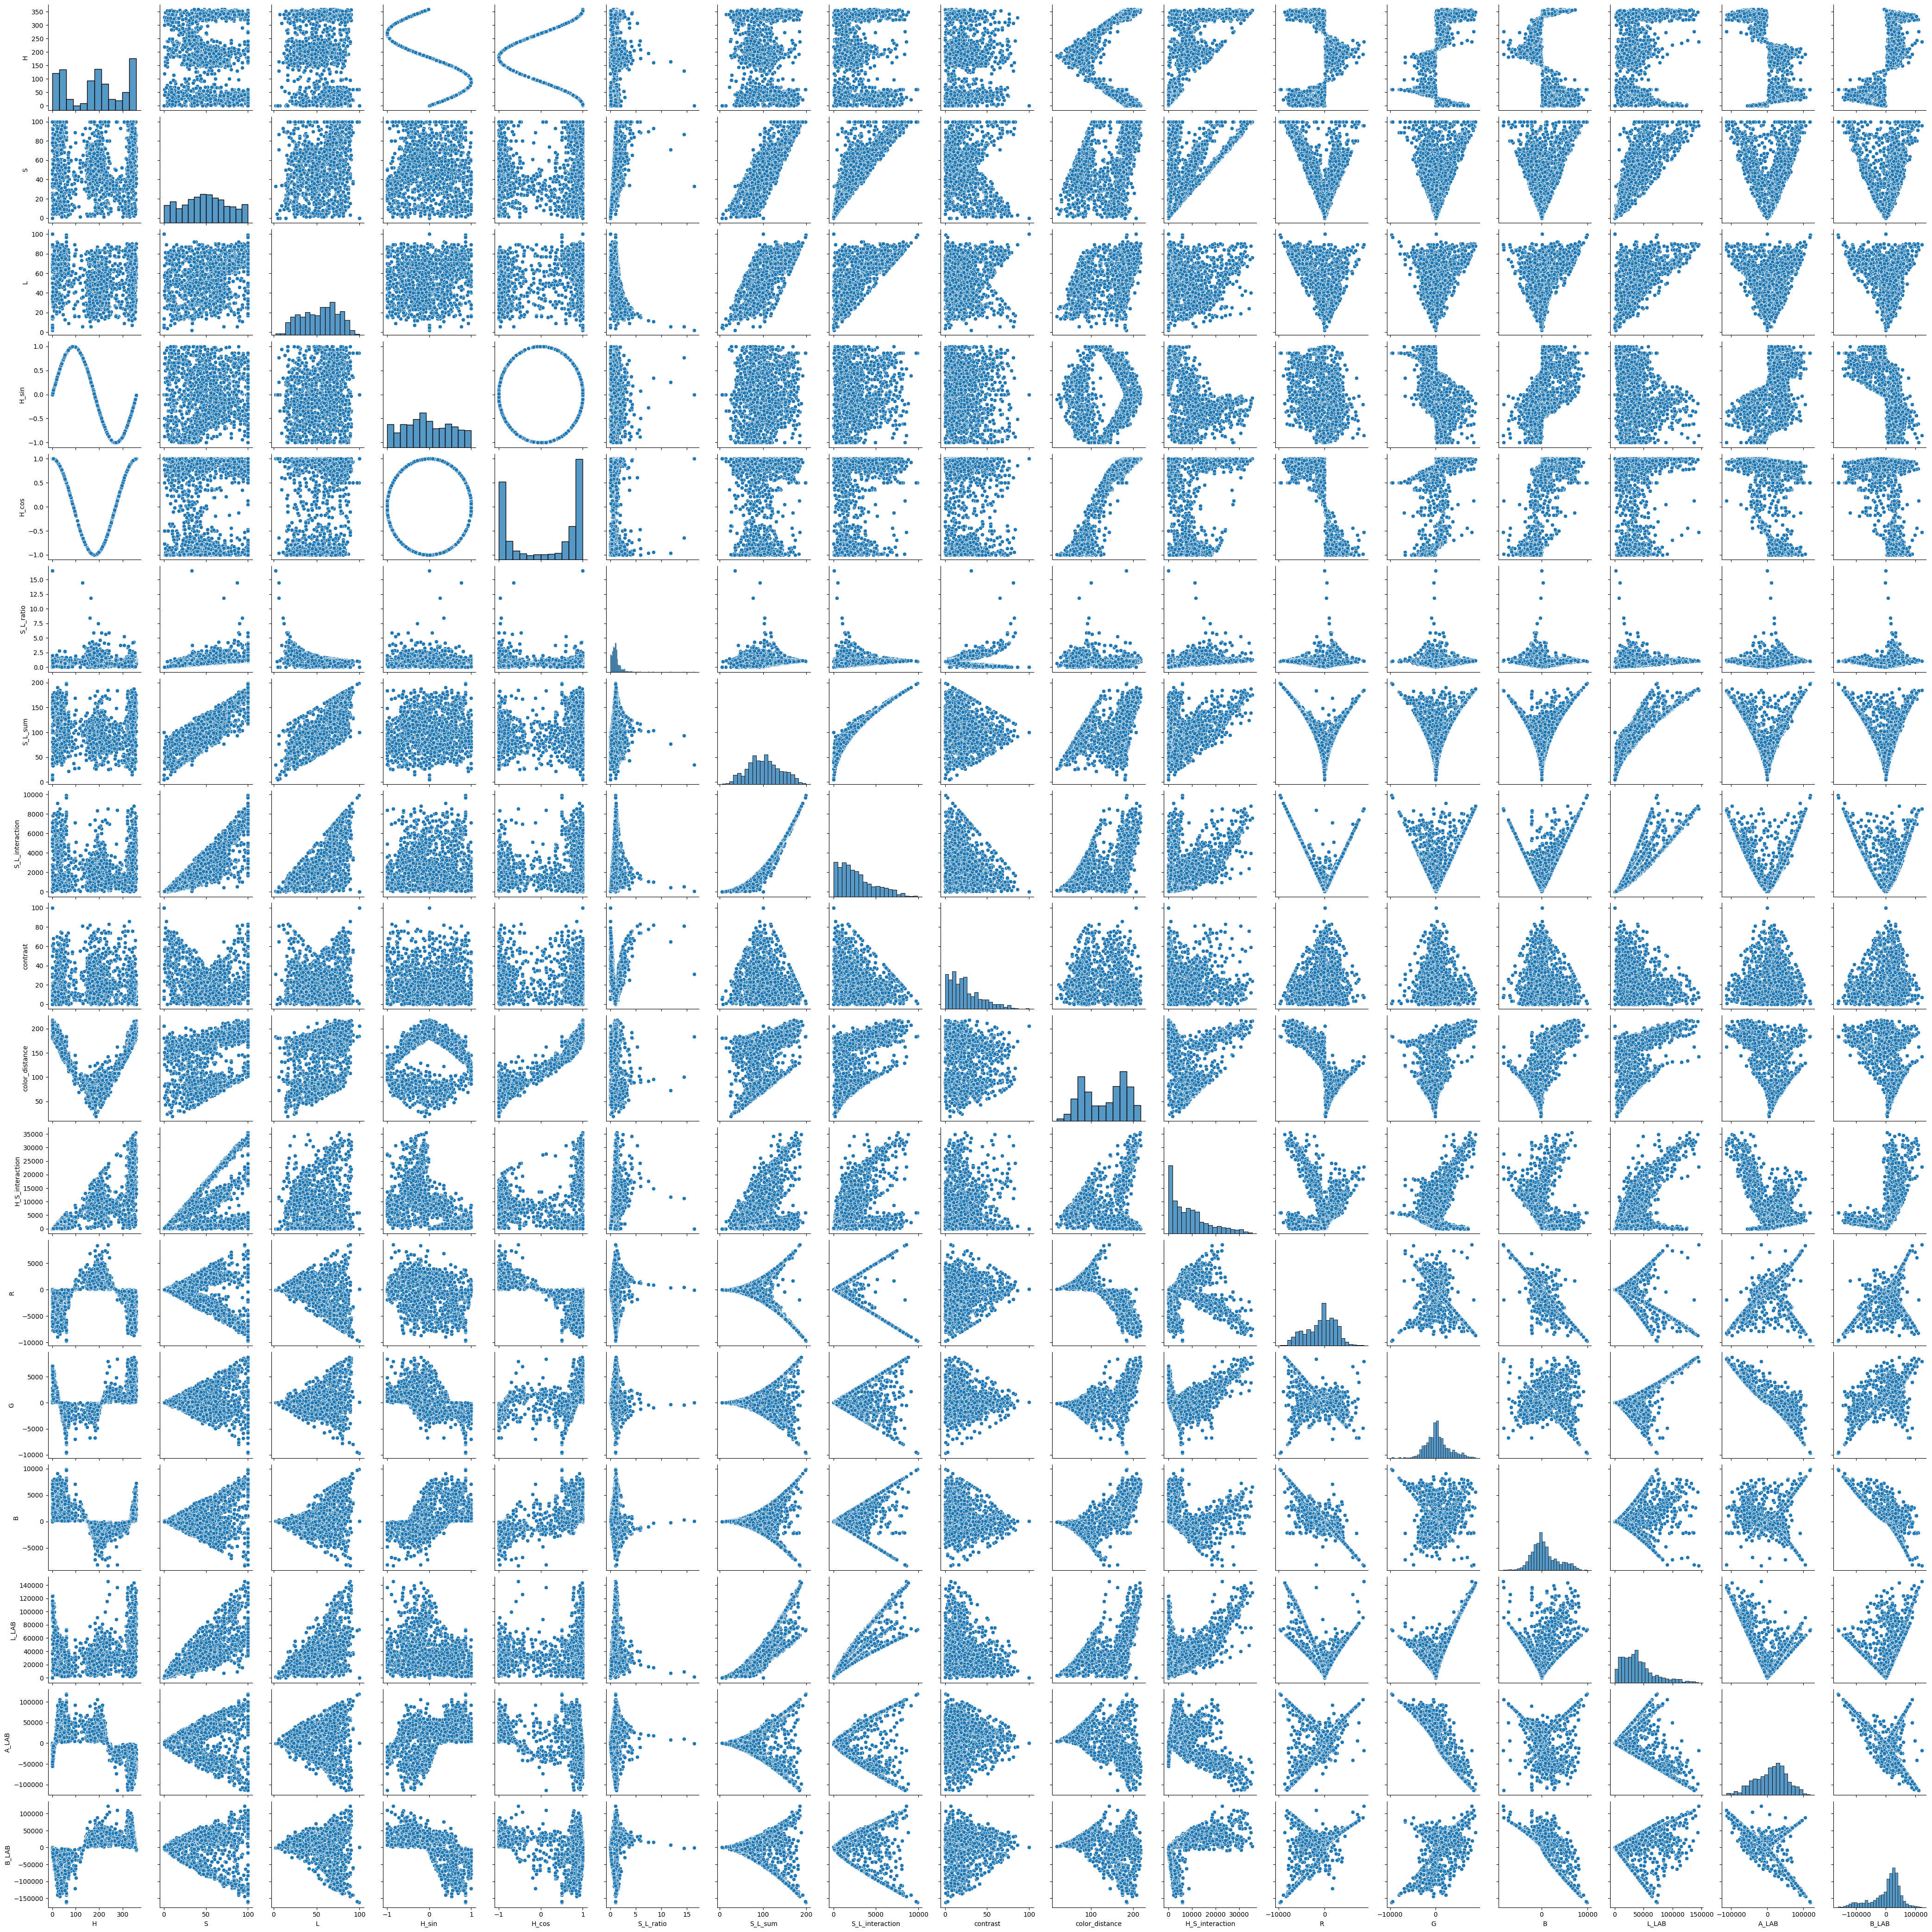

In [55]:
sns.pairplot(data=df)
plt.show()

In [11]:
df['Tag'].value_counts()

Tag
여름 트루      144
가을 뮤트      134
가을 트루      118
겨울 딥       115
겨울 트루      115
겨울 브라이트    113
가을 딥       112
여름 라이트     111
여름 뮤트      111
봄 브라이트     104
봄 트루        99
봄 라이트       98
Name: count, dtype: int64

In [12]:
# 데이터 개수 맞추기 (위에서 value_counts 확인하고 n값 바꾸기)
df_balanced = (
    df.groupby('Tag')
    .apply(lambda x: x.sample(n=98, random_state=42))
    .reset_index(drop=True)
)

df_balanced['Tag'].value_counts() # 최종 사용할 데이터

C:\Users\USER\AppData\Local\Temp\ipykernel_16276\974363291.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=98, random_state=42))


Tag
가을 딥       98
가을 뮤트      98
가을 트루      98
겨울 딥       98
겨울 브라이트    98
겨울 트루      98
봄 라이트      98
봄 브라이트     98
봄 트루       98
여름 라이트     98
여름 뮤트      98
여름 트루      98
Name: count, dtype: int64

## 모델 훈련

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from skimage import color
import colorsys

# Step 4: Feature & Label 분리
X = df.drop(columns=["Tag"])  # Feature: H_sin, H_cos, S, L
y = df["Tag"]                 # Target Label

# Step 5: Train-Test 분할 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: 데이터 정규화 (S, L 값)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: 모델 학습 (RandomForest 사용)
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)
# model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8: 예측 및 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 9: 세부 평가 결과 출력
print(classification_report(y_test, y_pred))


Accuracy: 0.26
              precision    recall  f1-score   support

        가을 딥       0.19      0.22      0.21        27
       가을 뮤트       0.20      0.34      0.25        35
       가을 트루       0.35      0.21      0.26        43
        겨울 딥       0.25      0.30      0.27        37
     겨울 브라이트       0.36      0.20      0.25        41
       겨울 트루       0.20      0.25      0.22        32
       봄 라이트       0.18      0.20      0.19        25
      봄 브라이트       0.26      0.18      0.21        34
        봄 트루       0.18      0.10      0.13        30
      여름 라이트       0.16      0.22      0.18        32
       여름 뮤트       0.50      0.29      0.37        31
       여름 트루       0.40      0.50      0.44        46

    accuracy                           0.26       413
   macro avg       0.27      0.25      0.25       413
weighted avg       0.28      0.26      0.26       413



In [23]:
# 정확도가 너무 낮아 모델 하이퍼 파라미터 튜닝
# 최적의 하이퍼 파라미터 찾기

from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV 사용하여 하이퍼파라미터 최적화
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


RF 정확도가 너무 낮아서 모델을 변경해보고자 함

SVM

In [16]:
# SVM + XGBoost + VotingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Step 4: Feature & Label 분리
X = df.drop(columns=["Tag"])  # Feature: H_sin, H_cos, S, L
y = df["Tag"]                 # Target Label

# Step 5: Train-Test 분할 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: 데이터 정규화 (S, L 값)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: 각 모델 생성
svm_model = SVC(kernel='rbf', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Step 8: 앙상블 모델 (VotingClassifier)
ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model), ('xgb', xgb_model)], voting='hard')

# Step 9: 앙상블 모델 학습
ensemble_model.fit(X_train_scaled, y_train)

# Step 10: 예측 및 평가
y_pred = ensemble_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.2f}")

# Step 11: 세부 평가 결과 출력
print(classification_report(y_test, y_pred))

Ensemble Accuracy: 0.25
              precision    recall  f1-score   support

        가을 딥       0.14      0.19      0.16        21
       가을 뮤트       0.24      0.42      0.30        24
       가을 트루       0.32      0.39      0.35        23
        겨울 딥       0.29      0.33      0.31        24
     겨울 브라이트       0.29      0.24      0.26        25
       겨울 트루       0.29      0.24      0.26        25
       봄 라이트       0.09      0.17      0.11        12
      봄 브라이트       0.29      0.22      0.25        23
        봄 트루       0.25      0.09      0.13        23
      여름 라이트       0.11      0.09      0.10        22
       여름 뮤트       0.33      0.24      0.28        21
       여름 트루       0.44      0.34      0.39        32

    accuracy                           0.25       275
   macro avg       0.26      0.25      0.24       275
weighted avg       0.27      0.25      0.25       275



In [17]:
import lightgbm as lgb

# LightGBM 모델 사용
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
y_pred_lgb = lgb_model.predict(X_test_scaled)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3290
[LightGBM] [Info] Number of data points in the train set: 1099, number of used features: 16
[LightGBM] [Info] Start training from score -2.491296
[LightGBM] [Info] Start training from score -2.301676
[LightGBM] [Info] Start training from score -2.448279
[LightGBM] [Info] Start training from score -2.491296
[LightGBM] [Info] Start training from score -2.524819
[LightGBM] [Info] Start training from score -2.502346
[LightGBM] [Info] Start training from score -2.547809
[LightGBM] [Info] Start training from score -2.607707
[LightGBM] [Info] Start training from score -2.671423
[LightGBM] [Info] Start training from score -2.513520
[LightGBM] [Info] Start training from score -2.502346
[LightGBM] [Info] Start training from score -2.283657
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
